# SARIMA Model

## SARIMA(p,d,q)(P,D,Q)m
## Seasonal Autoregressive Integrated Moving Averages

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables.

In [52]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv("co2_mm_mlo.csv")

In [19]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [20]:
# Creating Date Time Index from Data:

df["Date"] = pd.to_datetime({"year":df["year"], "month":df["month"], "day":1})

In [21]:
df.head()

,year,month,decimal_date,average,interpolated,Date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [22]:
df = df.set_index("Date")

In [23]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [24]:
df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='Date', length=729, freq=None)

In [25]:
df.index.freq = "MS"

In [26]:
df.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='Date', length=729, freq='MS')

<AxesSubplot:xlabel='Date'>

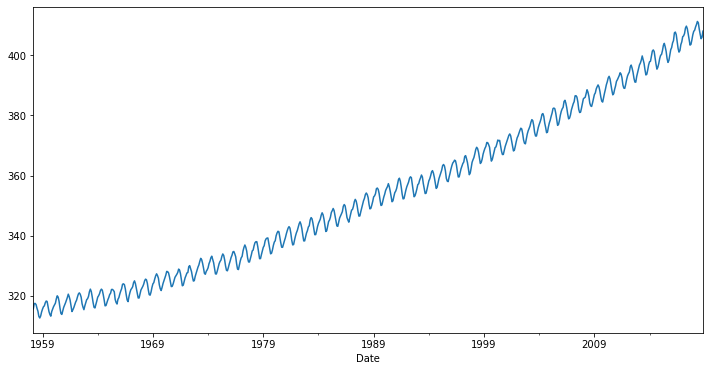

In [28]:
df["interpolated"].plot(figsize= (12,6))

### ETS Decompose:

In [29]:
decomp = seasonal_decompose(df["interpolated"], model= "add")

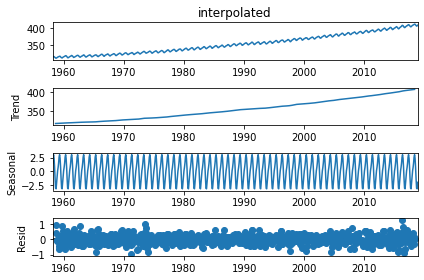

In [30]:
decomp.plot();

<AxesSubplot:xlabel='Date'>

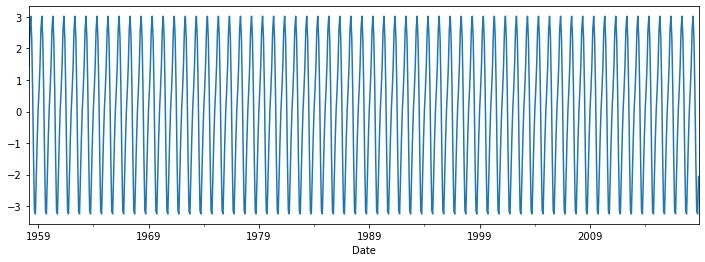

In [31]:
decomp.seasonal.plot(figsize= (12,4))

### Auto Arima to Obtain (p,d,q) and (P,D,Q,m):

In [32]:
grid_arima = auto_arima(df["interpolated"], seasonal= True, m= 12,
          start_p = 0, start_q= 0, start_P= 0, start_Q= 0, maxiter=300, trace= True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2369.532, Time=0.09 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1614.808, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2375.248, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1935.623, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=428.681, Time=2.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=791.747, Time=0.49 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=431.798, Time=4.66 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=431.208, Time=4.30 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1425.289, Time=1.08 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=617.368, Time=1.82 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=3.54 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=460.473, Time=1.88 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : A

In [33]:
grid_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Thu, 24 Nov 2022   AIC                            423.401
Time:                                      07:23:56   BIC                            450.943
Sample:                                  03-01-1958   HQIC                           434.028
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3560      0.035    -10.073      0.000      -0.425      -0.287
ma.L2         -0.0224      0.028     -0.792      0.428      -0.078       0.033
ma.L3         -0.0861      0.028     -3.042      0.002      -0.142      -0.031
ar.S.L12       0.9996      0.000   2870.137      0.000       0.999       1.000
ma.S.L12      -0.8653      0.021    -40.475      0.000      -0.907      -0.823
sigma2         0.0956      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# So, (p,d,q)(P,D,Q,m) = (0,1,3)(1,0,1,12)

### Train Test Split:

In [35]:
df.head()

,year,month,decimal_date,average,interpolated
Date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [36]:
df.tail()

,year,month,decimal_date,average,interpolated
Date,,,,,
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51
2018-10-01,2018,10,2018.792,406.00,406.00
2018-11-01,2018,11,2018.875,408.02,408.02


In [37]:
len(df)

729

In [38]:
train_data = df[:693]
test_data = df[693:]

In [39]:
train_data.shape

(693, 5)

In [40]:
test_data.shape

(36, 5)

### SARIMA(0,1,3)(1,0,1,12) Model:

In [41]:
model = SARIMAX(train_data["interpolated"], order= (0,1,3), seasonal_order= (1,0,1,12))

In [42]:
results = model.fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  693
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -183.669
Date:                              Thu, 24 Nov 2022   AIC                            379.337
Time:                                      07:28:29   BIC                            406.575
Sample:                                  03-01-1958   HQIC                           389.872
                                       - 11-01-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3557      0.034    -10.428      0.000      -0.423      -0.289
ma.L2         -0.0465      0.026     -1.817      0.069      -0.097       0.004
ma.L3         -0.0652      0.030     -2.151      0.031      -0.125      -0.006
ar.S.L12       0.9997      0.000   3508.073      0.000       0.999       1.000
ma.S.L12      -0.8740      0.022    -39.762      0.000      -0.917      -0.831
sigma2         0.0916      0.005     18.877      0.000       0.082       0.101
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.78   Prob(JB):                         0.53
Heteroskedasticity (H):               1.06   Skew:                            -0.08
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Predictions on Test Data:

In [45]:
start = len(train_data)

end = len(train_data) + len(test_data) - 1

In [46]:
preds = results.predict(start= start, end= end, typ= "levels", dynamic= False)

In [47]:
preds

2015-12-01    401.395552
2016-01-01    402.519924
2016-02-01    403.188114
2016-03-01    404.138750
2016-04-01    405.487927
2016-05-01    406.128751
2016-06-01    405.379349
2016-07-01    403.813341
2016-08-01    401.699984
2016-09-01    400.263980
2016-10-01    400.488145
2016-11-01    401.960154
2016-12-01    403.406428
2017-01-01    404.583315
2017-02-01    405.286113
2017-03-01    406.236475
2017-04-01    407.585263
2017-05-01    408.225901
2017-06-01    407.476716
2017-07-01    405.911160
2017-08-01    403.798413
2017-09-01    402.362824
2017-10-01    402.586923
2017-11-01    404.058508
2017-12-01    405.504364
2018-01-01    406.680911
2018-02-01    407.383507
2018-03-01    408.333594
2018-04-01    409.681992
2018-05-01    410.322446
2018-06-01    409.573477
2018-07-01    408.008373
2018-08-01    405.896236
2018-09-01    404.461062
2018-10-01    404.685096
2018-11-01    406.156256
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

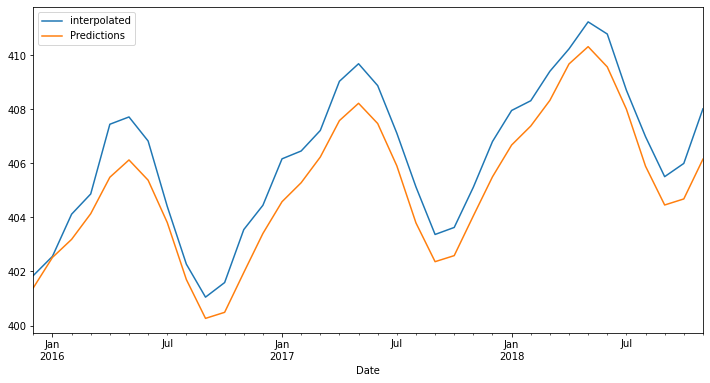

In [50]:
# Plotting Test Data and Predictions:

test_data["interpolated"].plot(figsize= (12,6), legend= True)
preds.plot(label= "Predictions", legend= True)

In [51]:
# Model Evaluation:

In [53]:
np.sqrt(mean_squared_error(test_data["interpolated"], preds))

1.1759572518877133

### Training Model on Whole Data and Future Forecasting:

In [54]:
final_model = SARIMAX(df["interpolated"], order=(0,1,3),seasonal_order=(1,0,1,12))

In [55]:
results = final_model.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Thu, 24 Nov 2022   AIC                            423.401
Time:                                      07:35:05   BIC                            450.943
Sample:                                  03-01-1958   HQIC                           434.028
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3560      0.035    -10.073      0.000      -0.425      -0.287
ma.L2         -0.0224      0.028     -0.792      0.428      -0.078       0.033
ma.L3         -0.0861      0.028     -3.042      0.002      -0.142      -0.031
ar.S.L12       0.9996      0.000   2870.137      0.000       0.999       1.000
ma.S.L12      -0.8653      0.021    -40.475      0.000      -0.907      -0.823
sigma2         0.0956      0.005     20.324      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
# Future Forecasting:

forecast = results.predict(start= len(df), end= len(df)+24, typ= "levels")

In [58]:
forecast

2018-12-01    409.255203
2019-01-01    410.416321
2019-02-01    411.058184
2019-03-01    411.987686
2019-04-01    413.447184
2019-05-01    414.103469
2019-06-01    413.367621
2019-07-01    411.625470
2019-08-01    409.577278
2019-09-01    408.123935
2019-10-01    408.424311
2019-11-01    410.023027
2019-12-01    411.452531
2020-01-01    412.641980
2020-02-01    413.327937
2020-03-01    414.257079
2020-04-01    415.716010
2020-05-01    416.372040
2020-06-01    415.636478
2020-07-01    413.895003
2020-08-01    411.847608
2020-09-01    410.394829
2020-10-01    410.695088
2020-11-01    412.293183
2020-12-01    413.722132
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Date'>

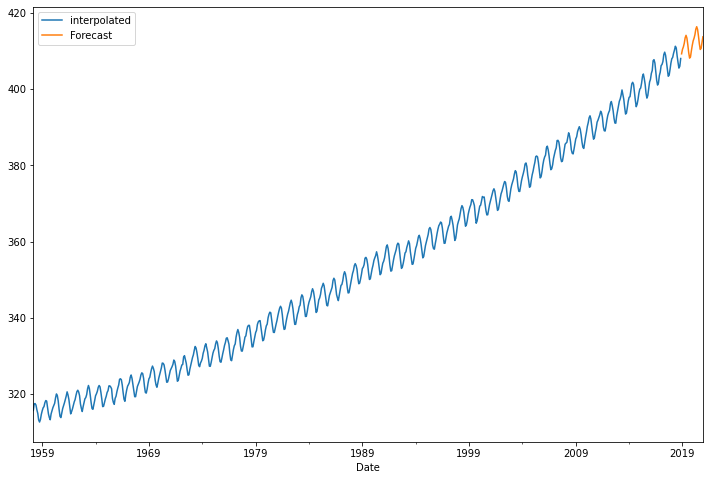

In [60]:
# Plotting Hostoric Data with Forecast:

df["interpolated"].plot(figsize= (12,8), legend= True)
forecast.plot(label= "Forecast", legend= True)